In [1]:
#Github Machine-Learning-in-Action

In [2]:
#1.k-NN算法实践
#k近邻法(k-nearest neighbor, k-NN)是1967年由Cover T和Hart P提出的一种基本分类与回归方法
#它的工作原理是：存在一个样本数据集合，也称作为训练样本集，并且样本集中每个数据都存在标签
#即我们知道样本集中每一个数据与所属分类的对应关系。输入没有标签的新数据后
#将新的数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本最相似数据(最近邻)的分类标签
#一般来说，我们只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中k的出处，通常k是不大于20的整数
#最后，选择k个最相似数据中出现次数最多的分类，作为新数据的分类

(6, 2)
[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]
['爱情片', '爱情片', '爱情片', '动作片', '动作片', '动作片']


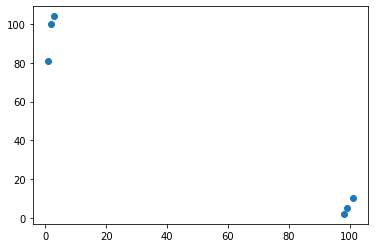

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


"""
Parameters:
    无
Returns:
    group - 数据集
    labels - 分类标签
"""
# 函数说明:创建数据集
def createDataSet():
    #六组二维特征 每个电影包含两个维度的数据 第一个维度数据是打头镜头 第二个维度数据是接吻镜头
    group = np.array([[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]])
    #六组特征的标签
    labels = ['爱情片','爱情片','爱情片','动作片','动作片','动作片']
    return group, labels

def showDataSet(dataMat, labelMat):
    data_plus = []
    for i in range(len(group)):
        data_plus.append(dataMat[i])
    data_plus_np = np.array(data_plus)# 转换为numpy矩阵
    #transpose专置后第一行是打斗镜头 第二行是接吻镜头
    plt.scatter(np.transpose(data_plus_np)[0],np.transpose(data_plus_np)[1])#散点图
    plt.show()


#创建数据集
group, labels = createDataSet()
#打印数据集
print(group.shape)
print(group)
print(labels)
showDataSet(group,labels)

In [5]:
import operator
# k-近邻算法的一般流程
# (1) 收集数据：可以使用任何方法。
# (2) 准备数据：距离计算所需要的数值，最好是结构化的数据格式。
# (3) 分析数据：可以使用任何方法。
# (4) 训练算法：此步骤不适用于k-近邻算法。
# (5) 测试算法：计算错误率。
# (6) 使用算法：首先需要输入样本数据和结构化的输出结果
#     然后运行k-近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。

"""
Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果
"""
# 函数说明:kNN算法,分类器
def classify0(inX, dataSet, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    #在列向量方向上重复inX共1次(横向)，行向量方向上重复inX共dataSetSize次(纵向)
    print(np.tile(inX, (dataSetSize, 1))) #tile是将数据沿着x轴和y轴扩充 这里是为了把inX测试数据扩大成和训练集一样的size
    #方便计算欧拉距离 也就是[a,b]的数据要复制N行 N是训练集的行数 列不用 因为大家的特征数据维度默认是一样的
    print(dataSet)#验证一下即可 tile后与训练集的数据size一致
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet #减去训练集 计算欧式距离 但是还差平方和求和
    #二维特征相减后平方
    sqDiffMat = diffMat**2 #平方后还差相加 相加是同一行进行
    #sum()所有元素相加，sum(0)列相加，sum(1)行相加
    print(sqDiffMat)
    sqDistances = sqDiffMat.sum(axis=1) #axis=0 沿着行的方向 最后只剩下一行 axis=1 沿着列的方向 最后只剩下一列
    print(sqDistances) #验证下即可
    #开方，计算出距离
    distances = sqDistances**0.5
    print(distances) #验证下即可
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    print(sortedDistIndices)
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]] #爱情或者动作
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 #累加爱情或动作的出现次数
        print(classCount[voteIlabel])
    #python3中用items()替换python2中的iteritems()
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    print(sortedClassCount[0][0],sortedClassCount[0][1])
    return sortedClassCount[0][0]


#创建数据集
group, labels = createDataSet()
#测试集
test = [101,20]
test1= [21,129]
#kNN分类
test_class = classify0(test, group, labels, 3)
#打印分类结果
print(test_class)
test_class1 = classify0(test1, group, labels, 3)
print(test_class1)

[[101  20]
 [101  20]
 [101  20]
 [101  20]
 [101  20]
 [101  20]]
[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]
[[ 9604  7056]
 [ 9801  6400]
 [10000  3721]
 [    0   100]
 [    4   225]
 [    9   324]]
[16660 16201 13721   100   229   333]
[129.0736224  127.28314892 117.13667231  10.          15.13274595
  18.24828759]
[3 4 5 2 1 0]
1
2
3
动作片 3
动作片
[[ 21 129]
 [ 21 129]
 [ 21 129]
 [ 21 129]
 [ 21 129]
 [ 21 129]]
[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]
[[  324   625]
 [  361   841]
 [  400  2304]
 [ 6400 14161]
 [ 6084 15376]
 [ 5929 16129]]
[  949  1202  2704 20561 21460 22058]
[ 30.8058436   34.66987165  52.         143.39107364 146.49232062
 148.51935901]
[0 1 2 3 4 5]
1
2
3
爱情片 3
爱情片


In [6]:
#分类器并不会得到百分百正确的结果，我们可以使用多种方法检测分类器的正确率
#此外分类器的性能也会受到多种因素的影响，如分类器设置和数据集等。除此之外，不同的算法在不同数据集上的表现可能完全不同
#k-近邻算法没有进行数据的训练，直接使用未知的数据与已知的数据进行比较，得到结果。因此，可以说k-邻近算法不具有显式的学习过程

# 在约会网站上使用k-近邻算法
# (1) 收集数据：提供文本文件。
# (2) 准备数据：使用Python解析文本文件。
# (3) 分析数据：使用Matplotlib画二维扩散图。
# (4) 训练算法：此步骤不适用于k-近邻算法。
# (5) 测试算法：使用海伦提供的部分数据作为测试样本。测试样本和非测试样本的区别在于
#     测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。
# (6) 使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型

# 我的朋友海伦就是这样一个人，她一直使用在线约会网站寻找适合自己的约会对象
# 但是她发现尽管约会网站会推荐不同的人选，但并不是每一个人她都喜欢
# 经过一番总结，她发现曾交往过三种类型的人：不喜欢的人、魅力一般的人和极具魅力的人
# 她希望我们的分类软件可以更好地帮助她将匹配对象划分到确切的分类中
# 此外，海伦自己还收集了一些约会网站未曾记录的数据信息，她认为这些数据更有助于匹配对象的归类
# 海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中
# 每个样本数据占据一行，总共有1000行。海伦的样本主要包含以下3种特征：
# 每年获得的飞行常客里程数
# 玩视频游戏所耗时间百分比
# 每周消费的冰淇淋公升数
# 观察数据，可以看到有largeDoses、smallDoses、didntLike三类标记

In [7]:

# 在将上述特征数据输入到分类器前，必须将待处理的数据的格式改变为分类器可以接收的格式
# 分类器接收的数据是什么格式的？从前面讲的你已经知道，要将数据分类两部分，即 特征矩阵 和对应的 分类标签 向量
# 在kNN.py中创建名为file2matrix的函数，以此来处理输入格式问题。该函数的输入为文件名字符串，输出为 训练样本矩阵 和 类标签向量
"""
Parameters:
    filename - 文件名
Returns:
    returnMat - 特征矩阵
    classLabelVector - 分类Label向量
"""
# 函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力
def file2matrix(filename):
    #打开文件
    fr = open(filename)
    #读取文件所有内容
    arrayOLines = fr.readlines()
    #得到文件行数
    numberOfLines = len(arrayOLines)
    #返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0
    for line in arrayOLines:
        #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip() #该方法只能删除开头或是结尾的字符，不能删除中间部分的字符
        #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3] #存放3列数据 分别是里程数 游戏时间占比 每周冰淇淋消耗公升数
        #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector



#打开的文件名
filename = "datingTestSet.txt"
#打开并处理数据
datingDataMat, datingLabels = file2matrix(filename)
print(datingDataMat[0:5])#前5行数据
print(datingLabels[0:5])#前5行数据对应的分类

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 [7.5136000e+04 1.3147394e+01 4.2896400e-01]
 [3.8344000e+04 1.6697880e+00 1.3429600e-01]]
[3, 2, 1, 1, 1]


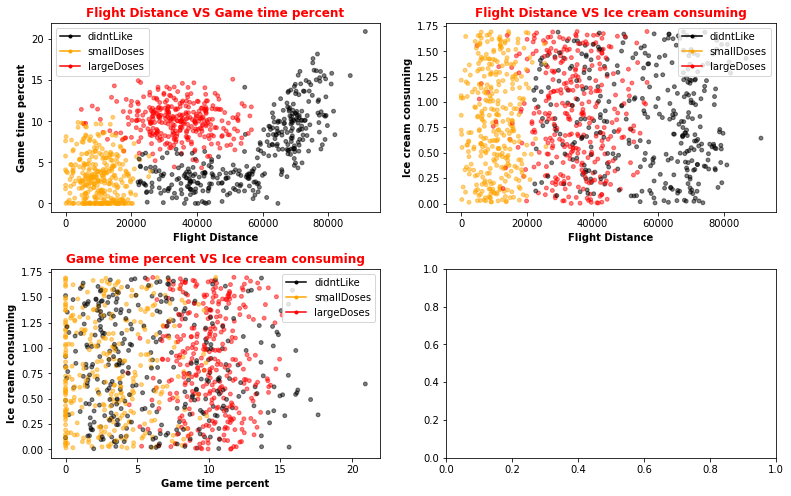

In [8]:
import matplotlib.lines as mlines

"""
Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
"""
# 函数说明:可视化数据
def showdatas(datingDataMat, datingLabels):
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'Flight Distance VS Game time percent')
    axs0_xlabel_text = axs[0][0].set_xlabel(u'Flight Distance')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'Game time percent')
    plt.setp(axs0_title_text, size=12, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=10, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=10, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'Flight Distance VS Ice cream consuming')
    axs1_xlabel_text = axs[0][1].set_xlabel(u'Flight Distance')
    axs1_ylabel_text = axs[0][1].set_ylabel(u'Ice cream consuming')#set property
    plt.setp(axs1_title_text, size=12, weight='bold', color='red') #setp()可以作用于一个列表对象或者是一个单一的对象
    plt.setp(axs1_xlabel_text, size=10, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=10, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'Game time percent VS Ice cream consuming')
    axs2_xlabel_text = axs[1][0].set_xlabel(u'Game time percent')
    axs2_ylabel_text = axs[1][0].set_ylabel(u'Ice cream consuming')
    plt.setp(axs2_title_text, size=12, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=10, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=10, weight='bold', color='black')
    #调整子图之间的距离
    plt.subplots_adjust(wspace =0.2, hspace =0.3)#调整子图间距

    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()



showdatas(datingDataMat, datingLabels)

In [16]:
# 很容易发现，上面方程中数字差值最大的属性对计算结果的影响最大
# 也就是说，每年获取的飞行常客里程数对于计算结果的影响将远远大于表2-3中其他两个特征
# 玩视频游戏的和每周消费冰淇淋公升数——的影响。而产生这种现象的唯一原因
# 仅仅是因为飞行常客里程数远大于其他特征值。但海伦认为这三种特征是同等重要的
# 因此作为三个等权重的特征之一，飞行常客里程数并不应该如此严重地影响到计算结果
# 在处理这种不同取值范围的特征值时，通常采用的方法是将数值归一化
# 如将取值范围处理为0到1或者-1到1之间。下面的公式可以将任意取值范围的特征值转化为0到1区间内的值
# newValue=(oldValue-min)/(max-min)
#其中min和max分别是数据集中的最小特征值和最大特征值
#虽然改变数值取值范围增加了分类器的复杂度，但为了得到准确结果，我们必须这样做

"""
Parameters:
    dataSet - 特征矩阵
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
"""
# 函数说明:对数据进行归一化
def autoNorm(dataSet):
    #获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    print(minVals) #每个列中的最小值
    print(maxVals) #每个列中的最大值
    #最大值和最小值的范围
    ranges = maxVals - minVals
    #shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    #返回dataSet的行数
    m = dataSet.shape[0]
    #原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m, 1)) # newValue=(oldValue-min)/(max-min)
    #除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m, 1)) # newValue=(oldValue-min)/(max-min)
    #返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals

normDataSet, ranges, minVals = autoNorm(datingDataMat)
print(normDataSet)
print(ranges)
print(minVals)
print(normDataSet.shape)

[0.       0.       0.001156]
[9.1273000e+04 2.0919349e+01 1.6955170e+00]
[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]
(1000, 3)


In [10]:
# 机器学习算法一个很重要的工作就是评估算法的正确率，通常我们只提供已有数据的90%作为训练样本来训练分类器
# 而使用其余的10%数据去测试分类器，检测分类器的正确率。需要注意的是，10%的测试数据应该是随机选择的
# 由于海伦提供的数据并没有按照特定目的来排序，所以我么你可以随意选择10%数据而不影响其随机性

#对于分类器来说，错误率就是分类器给出错误结果的次数除以测试数据的总数，完美分类器的错误率为0
#而错误率为1.0的分类器不会给出任何正确的分类结果。代码里我们定义一个计数器变量
#每次分类器错误地分类数据，计数器就加1，程序执行完成之后计数器的结果除以数据点总数即是错误率

In [11]:
"""
Parameters:
    无
Returns:
    normDataSet - 数据归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
"""
# 函数说明:分类器测试函数
def datingClassTest():
    #打开的文件名
    filename = "datingTestSet.txt"
    #将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = file2matrix(filename)
    #取所有数据的百分之十
    hoRatio = 0.10
    #数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #获得normMat的行数
    m = normMat.shape[0]
    #百分之十的测试数据的个数
    numTestVecs = int(m * hoRatio)
    #分类错误计数
    errorCount = 0.0

    for i in range(numTestVecs):
        #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],
            datingLabels[numTestVecs:m], 4)
        print("Classfier Result:%d\tTrue Result:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("Error Rate:%f%%" %(errorCount/float(numTestVecs)*100))



datingClassTest()

[0.       0.       0.001156]
[9.1273000e+04 2.0919349e+01 1.6955170e+00]
[[0.44832535 0.39805139 0.56233353]
 [0.44832535 0.39805139 0.56233353]
 [0.44832535 0.39805139 0.56233353]
 ...
 [0.44832535 0.39805139 0.56233353]
 [0.44832535 0.39805139 0.56233353]
 [0.44832535 0.39805139 0.56233353]]
[[0.46457331 0.53983597 0.12206372]
 [0.36871802 0.31502142 0.79791792]
 [0.10047878 0.2252441  0.11391374]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[[0.000264   0.02010287 0.19383751]
 [0.00633733 0.00689398 0.0555    ]
 [0.12099724 0.02986236 0.20108031]
 ...
 [0.02470111 0.01233245 0.00265623]
 [0.00620717 0.0014902  0.01777655]
 [0.00096613 0.00045124 0.04990064]]
[0.21420437 0.06873131 0.3519399  0.02837587 0.08686175 0.26349506
 0.18747548 0.30751452 0.19870705 0.45043291 0.1681131  0.14382804
 0.04433414 0.0709095  0.28589308 0.1376199  0.1003422  0.2646299
 0.09962588 0.07736446 0.28364826 0.15325309 0.49726884 0.318

[0.90312593 0.38412773 1.06788505 0.50839679 0.75151659 0.94881569
 0.86864408 0.58164365 0.48130654 1.14552748 0.69218396 0.74408101
 0.58172159 0.71574579 0.89461716 0.74629784 0.48838455 0.98215978
 0.57813201 0.74550539 0.77395675 0.27527637 1.17416936 1.01450938
 1.20203437 0.44967236 0.56069026 0.44707726 1.02783666 0.78286447
 0.76809021 0.9643566  0.79042674 0.33777256 0.55898121 0.67554313
 0.52422295 0.42338852 0.98429999 0.82728925 0.76432925 0.57119667
 0.81386067 0.32490625 0.5959451  0.71183906 0.40339675 0.73478509
 1.1573394  0.66998769 0.72927796 1.00801256 0.51549903 0.37579307
 0.68582407 0.42655288 1.08962522 0.96384185 0.732538   0.97881642
 0.38374842 0.92056217 0.66040271 0.48442558 0.8272521  0.98783506
 0.78160424 0.55279191 0.46821983 0.84450431 1.09362368 0.87265808
 0.81486277 0.18819861 0.12296584 0.39424403 0.74212954 0.72373463
 0.42820401 0.84836171 0.63735842 0.65796608 0.5526861  0.91227064
 0.77865512 0.66369529 0.4422828  0.96854759 0.42477276 0.6402

[0.98699109 0.09442388 0.79705719 0.20580834 0.65070219 0.47440229
 0.93042991 0.23696025 0.7896452  0.97227256 0.22068584 0.22427888
 0.34770838 0.54260383 1.10878147 0.22844187 0.62636749 0.76973223
 0.11256949 0.63180067 0.11867524 0.2045814  0.97735917 1.01233737
 0.98615394 0.02193899 0.31672393 0.22625464 1.01724942 1.01493365
 0.5458995  0.48499829 0.20208553 0.11365827 0.02975381 0.69296495
 0.17121281 0.15807294 1.14202899 0.63605215 0.44915056 0.2780324
 0.53066281 0.18213648 0.06421595 0.32360346 0.33588082 0.654163
 0.89561109 0.27292705 0.16664967 0.62530034 0.34101865 0.26072809
 0.42083306 0.30435612 0.8217593  0.4688871  0.58394468 1.29416526
 0.31294572 0.47281156 0.20251551 0.19125951 1.04448887 0.80063551
 1.07088907 0.32485367 0.09222009 0.38943469 1.15011406 0.36174378
 0.76929212 0.18979002 0.2263076  0.02862909 0.55375462 0.10629952
 0.4726158  0.57025643 0.33442401 0.04365779 0.14643604 0.81110494
 0.13138249 0.0902225  0.06289226 0.66775911 0.27344642 0.1125032

[2.39801672e-01 1.99586245e-01 1.75355975e-01 7.58940085e-02
 9.21648187e-02 8.03960299e-02 2.00887560e-01 2.94488738e-01
 5.61038726e-01 2.72802750e-01 5.92707510e-02 1.06916308e-01
 1.99603874e-01 5.05228605e-02 4.80616753e-01 4.61754239e-02
 4.10925367e-01 2.03348109e-01 9.14931607e-02 1.33235923e-01
 2.25785031e-01 3.39648935e-01 2.98139731e-01 3.32521352e-01
 3.40137431e-01 4.19311656e-01 6.59686696e-02 1.24020543e-01
 1.80817470e-01 4.65677766e-01 5.40900735e-02 2.33499794e-01
 7.68059357e-02 3.07865303e-01 3.32968674e-01 1.67225568e-01
 1.08965606e-01 1.35101231e-01 4.56687204e-01 3.93842893e-02
 1.82419615e-01 2.59085294e-01 9.00603490e-02 2.28757295e-01
 1.58809141e-01 4.70324487e-02 1.84847236e-01 3.59301142e-01
 3.70389190e-01 1.89023912e-02 1.10057525e-01 2.76064126e-01
 1.68918621e-01 1.75860809e-01 7.02818738e-02 3.20736648e-01
 3.34978284e-01 1.16499529e-01 4.56872260e-01 5.33924742e-01
 2.31895467e-01 7.42862791e-02 2.22095417e-01 9.17987234e-02
 4.99114349e-01 1.189123

[0.60358699 0.25936633 0.53825181 0.26454923 0.46443075 0.41876978
 0.59654665 0.62991943 0.6543824  0.61613213 0.42944436 0.19798538
 0.17563006 0.43464324 0.63720501 0.27529458 0.49055619 0.47266778
 0.26823814 0.39866056 0.33129155 0.50397083 0.63204643 0.57794679
 0.64846813 0.36714226 0.39281601 0.22972399 0.63512917 0.62197803
 0.37406592 0.39122227 0.37319175 0.46089174 0.29509113 0.54537146
 0.38999712 0.25169472 0.63771748 0.51893457 0.24439917 0.14414452
 0.32799034 0.27012291 0.24230224 0.48313461 0.41874029 0.3914756
 0.59664841 0.26804076 0.23200588 0.44175297 0.52766575 0.36201039
 0.2598398  0.25520099 0.53655249 0.41540482 0.37978847 0.72157696
 0.29484265 0.38680433 0.58815971 0.24001201 0.61925607 0.52300655
 0.65752123 0.22144182 0.36967749 0.28654187 0.71099953 0.30143777
 0.54968088 0.49728476 0.4656387  0.42437882 0.41939815 0.27361507
 0.42874033 0.35335667 0.26441045 0.32954956 0.16614679 0.56635057
 0.32072233 0.36712878 0.47190275 0.43369221 0.42681699 0.45512

[3.20544789e-01 2.22754259e-01 9.10491207e-02 1.45556757e-01
 2.00846589e-01 1.99604467e-02 3.18716422e-01 5.11836763e-01
 7.07798981e-01 1.57117983e-01 1.67685967e-01 1.51816325e-02
 1.28653589e-01 1.74108223e-01 4.58808488e-01 2.82375045e-02
 4.60755214e-01 1.01934864e-01 1.18971312e-01 1.62577449e-01
 1.02690747e-01 4.87203660e-01 1.60359582e-01 2.43928666e-01
 1.70916439e-01 3.41270089e-01 2.08838028e-01 1.69291626e-01
 2.47608454e-01 5.01109659e-01 9.83479816e-02 4.16758573e-02
 7.34912038e-02 4.15944202e-01 2.22790855e-01 3.50470683e-01
 2.28929698e-01 1.87578880e-01 3.88632378e-01 1.87900886e-01
 6.26308350e-02 1.40674911e-01 5.12041621e-02 2.59446814e-01
 1.19268680e-01 2.06157827e-01 3.30149962e-01 2.44285925e-01
 1.54063998e-01 5.83866864e-02 3.56354372e-02 7.25945053e-02
 3.85766245e-01 2.87960241e-01 7.23417184e-02 2.62012655e-01
 1.29221615e-01 1.87478488e-02 2.67406222e-01 5.39252467e-01
 2.65475153e-01 1.28001678e-02 3.97627796e-01 1.47408779e-01
 4.84059921e-01 1.182418

[[8.11450524e-08 5.65232390e-02 2.52037645e-01]
 [9.13370739e-03 1.67226707e-04 3.02136327e-02]
 [1.32357476e-01 5.90526148e-03 2.60287188e-01]
 ...
 [2.99736384e-02 4.28544377e-02 1.28374114e-02]
 [3.94666920e-03 1.81076595e-02 3.80610551e-02]
 [2.28598577e-04 5.58297298e-03 2.61212867e-02]]
[0.30856097 0.03951457 0.39854993 0.03894386 0.16146864 0.28443354
 0.28644608 0.32093458 0.23705523 0.50144984 0.19000296 0.122379
 0.0310052  0.13949469 0.34537649 0.13857116 0.11871623 0.30079523
 0.08782384 0.12918051 0.2265779  0.14346387 0.54144129 0.37194884
 0.58401654 0.15400685 0.09334068 0.00991144 0.40490015 0.2826354
 0.13275206 0.30116154 0.21629144 0.14124516 0.14468356 0.18327863
 0.11350743 0.02525269 0.39462818 0.23521813 0.11442552 0.0428715
 0.14440043 0.01585484 0.10607815 0.21125452 0.06939654 0.15044334
 0.52505404 0.08484724 0.13677534 0.33927676 0.17336781 0.04472086
 0.06802875 0.02729454 0.43369339 0.29929122 0.17217797 0.45155149
 0.01467452 0.24744905 0.31562779 0.0273

 0.07612581 0.04168359 0.57268732 0.16603894 0.29134297 0.47376162]
[0.51637678 0.62782206 0.19546622 0.48620928 0.42381345 0.11228499
 0.50999779 0.77905155 0.91946729 0.30228394 0.45370219 0.33377959
 0.51374799 0.39862743 0.69991236 0.29167128 0.7762715  0.30557365
 0.47557289 0.42362752 0.49825898 0.8129246  0.31136356 0.47690781
 0.34179434 0.77783444 0.50298801 0.53622191 0.37231863 0.74395983
 0.30640107 0.33075484 0.35719856 0.77280329 0.67257859 0.58434424
 0.5629042  0.56478243 0.62842362 0.35089785 0.3934238  0.5633251
 0.26657283 0.65765555 0.51734944 0.45701352 0.65525244 0.60546513
 0.38774767 0.32028392 0.37244471 0.35237376 0.66567683 0.63800038
 0.34569225 0.67749345 0.38206768 0.16873384 0.66957328 0.72740393
 0.64437838 0.11216147 0.68750729 0.50243461 0.73836669 0.22622368
 0.80446318 0.45491318 0.82498946 0.226449   0.41163487 0.34738865
 0.45124163 0.94905537 0.8588729  0.78435029 0.35949724 0.49687574
 0.69209807 0.51342227 0.35623672 0.64232229 0.44864184 0.3488

[840 476 193 303 880 679 153 112 178  11 166 261 221 621 149  50 311 336
 748 330 521 619  77 838 557 213 328 571 395 147 617 647 464 352 429 657
 530 170 456 101 305 642 102 585 257  91 690 542 789 835 369 537  44 611
 253  82 390 124 793 842 868 830 855 762 540 682  84 181  95 169 874 350
 208 441 610 357 829  20 310 758 828 317 505 588 410 774 578 736 889  15
 206 856 233 183 680 450 575  71 720 452 516 556 865 757 209 543 825 801
  41  81 796 570 677 708 633 199  69  34 262 703 704 304 443 674  18 623
 650 433 228 347 299 532 351 105 436 509 483 631 370 528 110 417 498 895
 321 864 284 716 742 100 663 678 558 195 201 813 278 607 368 160 279 474
 887 885  49 416 356 353 130 745 205  40  12 643 662 379 765 308 155  32
 515 691 886 156 447 460 672 562  63 136 235 345 701 767  85 230   1 168
 592 339  90 770 640 327  37 760 780 500 167 635   3 573  67 551 349  80
  27  31 427 269 478 849  54 144 346 118 735 845 882 180 367 608 246 523
 424 315 271 218 637 711 866 807  93  61 628 314 28

In [12]:
#分类器处理约会数据集的错误率是4%，这是一个相当不错的结果。我们可以改变函数datingClassTest内变量hoRatio和变量k的值
#检测错误率是否随着变量值的变化而增加。依赖于分类算法、数据集和程序设置，分类器的输出结果可能有很大的不同
#K值选择是KNN算法的关键,K值选择对近邻算法的结果有重大影响
#k过大 结果可能不准确 k太小 存在过拟合问题
#K近邻法如何对训练数据进行快速K近邻搜索(快速找到K个最近邻样本实例)是个问题
#最简单粗暴的方法:线性描述,就是通过计算输入样本与每个训练样本的距离,来找到最近邻的K个训练样本
#当训练样本很大时,计算很耗时,此时使用KDTree,可以大幅提高K近邻搜索的效率
#kd树算法分为两大部分:1.kd树这种数据结构建立的算法 ,2.在kd树上如何进行最近邻查找的算法
#scikit learn已经把这些都写好 会调用就行

In [13]:
# 示例：使用k-近邻算法的手写识别系统
# (1) 收集数据：提供文本文件。
# (2) 准备数据：编写函数classify0()，将图像格式转换为分类器使用的list格式。
# (3) 分析数据：在Python命令提示符中检查数据，确保它符合要求。
# (4) 训练算法：此步骤不适用于k-近邻算法。
# (5) 测试算法：编写函数使用提供的部分数据集作为测试样本，测试样本与非测试样本的区别在于测试样本是已经完成分类的数据
#     如果预测分类与实际类别不同，则标记为一个错误。
# (6) 使用算法：本例没有完成此步骤，若你感兴趣可以构建完整的应用程序，从图像中提取数字，并完成数字识别
#     美国的邮件分拣系统就是一个实际运行的类似系统

from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN

"""
Parameters:
    filename - 文件名
Returns:
    returnVect - 返回的二进制图像的1x1024向量
"""
# 函数说明:将32x32的二进制图像转换为1x1024向量。
def img2vector(filename):
    #创建1x1024零向量
    returnVect = np.zeros((1, 1024))
    #打开文件
    fr = open(filename)
    #按行读取
    for i in range(32):
        #读一行数据
        lineStr = fr.readline()
        #每一行的前32个元素依次添加到returnVect中
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    #返回转换后的1x1024向量
    return returnVect

# 函数说明:手写数字分类测试
def handwritingClassTest():
    #测试集的Labels
    hwLabels = []
    #返回trainingDigits目录下的文件名
    trainingFileList = listdir('trainingDigits')
    print(trainingFileList[0:5])
    #返回文件夹下文件的个数
    m = len(trainingFileList)
    #初始化训练的Mat矩阵,测试集
    trainingMat = np.zeros((m, 1024))#每个文件单独一行 1024个数据 32X32
    #从文件名中解析出训练集的类别
    for i in range(m):
        #获得文件的名字
        fileNameStr = trainingFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #将获得的类别添加到hwLabels中
        hwLabels.append(classNumber)
        #将每一个文件的1x1024数据存储到trainingMat矩阵中
        trainingMat[i,:] = img2vector('trainingDigits/%s' % (fileNameStr))
    #构建kNN分类器
    neigh = kNN(n_neighbors = 3, algorithm = 'auto')
    #拟合模型, trainingMat为测试矩阵,hwLabels为对应的标签
    neigh.fit(trainingMat, hwLabels)
    #返回testDigits目录下的文件列表
    testFileList = listdir('testDigits')
    #错误检测计数
    errorCount = 0.0
    #测试数据的数量
    mTest = len(testFileList)
    #从文件中解析出测试集的类别并进行分类测试
    for i in range(mTest):
        #获得文件的名字
        fileNameStr = testFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #获得测试集的1x1024向量,用于训练
        vectorUnderTest = img2vector('testDigits/%s' % (fileNameStr))
        #获得预测结果
        # classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        classifierResult = neigh.predict(vectorUnderTest)
        print("Classfier Result%d\t True Result%d" % (classifierResult, classNumber))
        if(classifierResult != classNumber):
            errorCount += 1.0
    print("Error for %d tests \n Error Rate %f%%" % (errorCount, errorCount/mTest * 100))



handwritingClassTest()

['0_0.txt', '0_1.txt', '0_10.txt', '0_100.txt', '0_101.txt']
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实

分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为3	真实结果为5
分类返回结果为6	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5

In [14]:
#上述代码使用的algorithm参数是auto，更改algorithm参数为brute，使用暴力搜索，你会发现，运行时间变长了，变为10s+
#更改n_neighbors参数，你会发现，不同的值，检测精度也是不同的。可以尝试更改这些参数的设置，加深对其函数的理解
#sklearn.neighbors.KNeighborsClassifier是一个很好的模型，k-近邻算法就是通过它实现的，详细的看这个博客
#https://blog.csdn.net/TeFuirnever/article/details/99818078 除了这个外KNei函数里面还有很多算法选择 比如Kd Tree之类的
#警告 关于最近邻居算法，如果发现两个邻居，邻居k+1和k具有相同距离但不同标签，则结果将取决于训练数据的排序 这里就要考虑
#不同特征之间是否要加权 有的特征是否重要很多

#k近邻法的三要素：k值选择。距离度量。决策规则 
#k是超参数，而不是需要学习的参数 通常采用交叉验证法来选取最优的k值
#k值过大，非相似数据被包含较多，造成噪声增加而导致分类结果的降低。
#k值过小，得到的邻近数过少，会降低分类精度，同时也会放大噪声数据的干扰
#K值选择的原则往往是经过大量独立测试数据、多个模型来验证最佳选择
#k一般低于训练样本数的平方根，通常采用交叉检验来确定
#对不同范围内的k做计算 然后找出错误率最低的k来作为最优化参数
#同样其他参数比如权重w等也要试试 找出最优的参数组合 这里的最优指的是测试集的准确率最高

#k-近邻算法是分类数据最简单最有效的算法，通过两个例子（约会网站和手写数字识别）讲述了如何使用k-近邻算法构造分类器
#k-近邻算法是基于实例的学习，使用算法时我们必须有接近实际数据的训练样本数据
#k-近邻算法必须保存全部数据集，如果训练数据集的很大，必须使用大量的存储空间
#此外，由于必须对数据集中的每个数据计算距离值，实际使用时可能非常耗时。
#KNN是一种基于记忆的学习(memory-based learning)，也是基于实例的学习(instance-based learning)，属于惰性学习(lazy learning)
#即它没有明显的前期训练过程，而是程序开始运行时，把数据集加载到内存后，不需要进行训练，就可以开始分类了
#k-近邻算法的另一个缺陷是它无法给出任何数据的基础结构信息，因此也无法知晓平均实例样本和典型实例样本具有什么特征
#下一章我们将使用概率测量方法处理分类问题，该算法可以解决这个问题
# model_selection:模型选择
# cross_val_score  cross：交叉，validation：验证（测试）
# 交叉验证
#from sklearn.model_selection import cross_val_score

# Scikit learn 也简称sklearn，是机器学习领域当中最知名的python模块之一。sklearn包含了很多机器学习的方式：

# Classification 分类
# Regression 回归
# Clustering 非监督分类
# Dimensionality reduction 数据降维
# Model Selection 模型选择
# Preprocessing 数据与处理

# 使用sklearn可以很方便地让我们实现一个机器学习算法。一个复杂度算法的实现，使用sklearn可能只需要调用几行API即可
# 所以学习sklearn，可以有效减少我们特定任务的实现周期



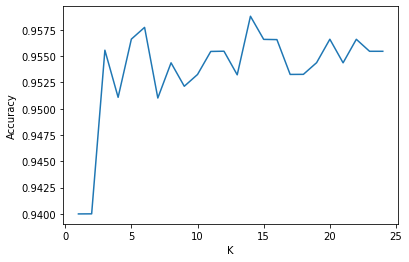

0.93


In [51]:
from sklearn.model_selection import train_test_split,cross_val_score #划分数据 交叉验证
from sklearn.neighbors import KNeighborsClassifier  #一个简单的模型，只有K一个参数，类似K-means
import matplotlib.pyplot as plt

X = normDataSet #这是数据
y = datingLabels #这是每个数据所对应的标签
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=1/10,random_state=0)
#这里划分数据以1/3的来划分 训练集训练结果 测试集测试结果 test_size表示测试集占总样本的百分比
k_range = range(1,25)
cv_scores = [] #用来放每个模型的结果值
for n in k_range:
    knn = KNeighborsClassifier(n)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
    scores = cross_val_score(knn,train_X,train_y,cv=6,scoring='accuracy')  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
    cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')#通过图像选择最好的参数
plt.show()
best_knn = KNeighborsClassifier(n_neighbors=3)# 选择最优的K=3传入模型
best_knn.fit(train_X,train_y)#训练模型
print(best_knn.score(test_X,test_y))

In [57]:
from mpl_toolkits.mplot3d import Axes3D

X = normDataSet #这是数据
y = datingLabels #这是每个数据所对应的标签
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=1/10,random_state=0)
#这里划分数据以1/3的来划分 训练集训练结果 测试集测试结果 test_size表示测试集占总样本的百分比
k_range=range(1,20)
result = {}
weights = ['distance','uniform']
for n in k_range:
    for w in weights:
        knn = KNeighborsClassifier(n_neighbors=n,weights=w) 
        #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
        scores = cross_val_score(knn,train_X,train_y,cv=6,scoring='accuracy').mean() 
        #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
        result[w + str(n)] = scores

print(result)

# # 绘制散点图
# fig = plt.figure()
# ax = Axes3D(fig)
 
# ax.scatter(range, y1, z1, c='r', label='A')

# # 绘制图例
# ax.legend(loc='best')
 
# # 添加坐标轴(顺序是Z, Y, X)
# ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
# ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
# ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
 
#plt.show()

best_knn = KNeighborsClassifier(n_neighbors=19,weights='distance')# 选择最优的K=3传入模型
best_knn.fit(train_X,train_y)#训练模型
print(best_knn.score(test_X,test_y))



{'distance1': 0.9399889078890835, 'uniform1': 0.9399889078890835, 'distance2': 0.9399889078890835, 'uniform2': 0.9399964637804565, 'distance3': 0.9511079680214506, 'uniform3': 0.9555600651776857, 'distance4': 0.9555233682900526, 'uniform4': 0.9510787282553689, 'distance5': 0.9555233682900526, 'uniform5': 0.9566124023965717, 'distance6': 0.9543900814045276, 'uniform6': 0.9577310693990557, 'distance7': 0.9488121544843189, 'uniform7': 0.951012398471771, 'distance8': 0.9566124023965717, 'uniform8': 0.9543605492277889, 'distance9': 0.9532495349370954, 'uniform9': 0.9521309667044332, 'distance10': 0.9543606460482064, 'uniform10': 0.9532495349370954, 'distance11': 0.9577015352729128, 'uniform11': 0.9554423218029964, 'distance12': 0.9577015352729128, 'uniform12': 0.9554643988075884, 'distance13': 0.9543458305749262, 'uniform13': 0.9532198052207129, 'distance14': 0.9554790186906293, 'uniform14': 0.958790569379432, 'distance15': 0.9577086980344026, 'uniform15': 0.9565901298017404, 'distance16': 